In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from xgboost import XGBRegressor
from sklearn import metrics

Import Dataset

In [7]:
df=pd.read_csv('/content/BostonHousing.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [8]:
df.shape

(506, 14)

In [10]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [14]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         5
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [15]:
df['rm'].fillna(df['rm'].median(),inplace=True)
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [16]:
correlation=df.corr()

<Axes: >

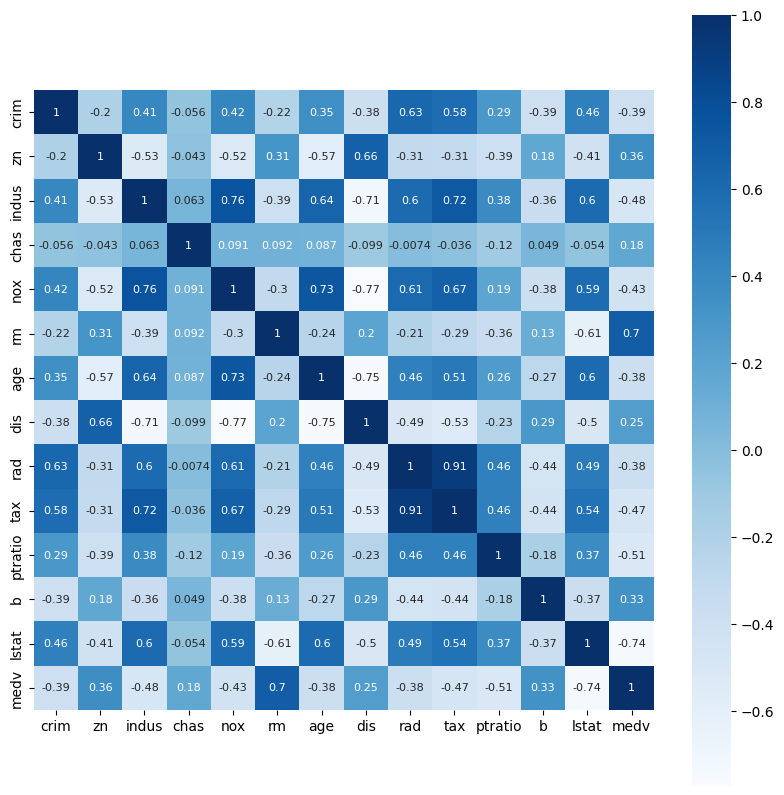

In [18]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,annot=True,annot_kws={'size':8},cmap='Blues')

In [20]:
x=df.drop(columns='medv',axis=1)
y=df['medv']
print(x.shape)
print(y.shape)

(506, 13)
(506,)


Train and split the data

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=None,random_state=2)
print(x_train.shape)
print(x_test.shape)

(404, 13)
(102, 13)


Model Training

In [23]:
model=XGBRegressor()

In [24]:
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [26]:
training_model_prediction=model.predict(x_train)
print(training_model_prediction)

[23.109243  21.003696  20.101334  34.692425  13.910139  13.507506
 22.005089  15.198149  10.891594  22.67888   13.8071995  5.599563
 29.798426  49.996235  34.898735  20.612434  23.371365  19.210869
 32.6951    19.623686  27.001514   8.392947  46.000008  21.708965
 27.087059  19.361763  19.305164  24.799057  22.602407  31.710638
 18.541985   8.693231  17.407127  23.699833  13.299252  10.521114
 12.698436  24.992722  19.69267   14.910451  24.194372  24.994839
 14.896042  17.001131  15.597166  12.692175  24.503181  15.010672
 50.004604  17.51685   21.19279   32.002262  15.5975065 22.897684
 19.314217  18.704931  23.292763  37.209682  30.099543  33.11402
 20.979755  49.99629   13.4027815  5.005398  16.49933    8.396688
 28.665228  19.490831  20.583405  45.39945   39.807297  33.403366
 19.79789   33.40312   25.28455   49.999336  12.52416   17.435389
 18.613676  22.588236  50.001896  23.808535  23.296852  23.095684
 41.704803  16.124998  31.599874  36.098976   7.0004077 20.375463
 19.982323 

In [27]:
#R square error
score_1=metrics.r2_score(y_train,training_model_prediction)

#Mean Absolute error
score_2=metrics.mean_absolute_error(y_train,training_model_prediction)

print(score_1)
print(score_2)

0.9999968312263217
0.011611743492655216


Model Evaluation

In [28]:
test_model_prediction=model.predict(x_test)
print(test_model_prediction)

[21.443787  21.382685  31.03777   30.440401   9.242298  13.067352
 26.168608  27.290655  24.529175  20.123384  26.45383   25.30407
 20.81324   19.605057  12.713254  23.975319  18.862185  10.6196165
  9.302639  15.002606  22.8106    20.266506  36.22977   18.680513
 15.568909  18.816381  46.273994  32.540077  34.16087   19.633312
 17.405287  19.74258   30.923426  24.357279  12.444985  18.9492
 10.523271  21.634762  21.470623  21.812595  27.35879   11.303096
 27.633917   8.731829  21.197802  12.969833  35.417053  14.9056015
 32.96828   16.30815   30.439468  26.27425    6.442677  33.80961
 26.041016  20.504984  19.175488  19.613745  16.177923  23.085384
 21.782282  21.11978   18.912626  29.852377  33.942497  25.994164
 49.65236   26.976103   9.221637  24.130259  17.145428   9.003653
 14.717888  18.628937  27.624092  23.963724  21.77629   20.908873
 19.28197   24.010424  34.052555  18.991041  20.703892  31.454273
 48.515926  36.553516  17.431547  24.19036   28.68024   20.908184
 20.397312  

In [29]:
score_1=metrics.r2_score(y_test,test_model_prediction)

#Mean Absolute error
score_2=metrics.mean_absolute_error(y_test,test_model_prediction)

print(score_1)
print(score_2)

0.9096701862139439
2.0460299052444157


Visualizing our model

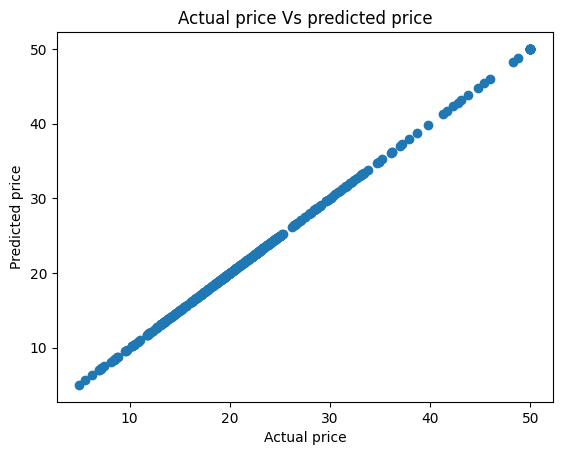

In [30]:
plt.scatter(y_train,training_model_prediction)
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Actual price Vs predicted price')
plt.show()

